In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns # pip install seaborn
import warnings

In [3]:
%matplotlib inline

In [3]:
np.seed=120
# 1- class
train_data=np.random.normal(size=(100,2))
train_label=np.zeros(100)

In [4]:
# 2- class
train_data=np.r_[train_data, np.random.normal(size=(100,2), loc=3)]
train_label=np.r_[train_label, np.ones(100)]

In [5]:
nn=train_data.shape
print(nn)

(200, 2)


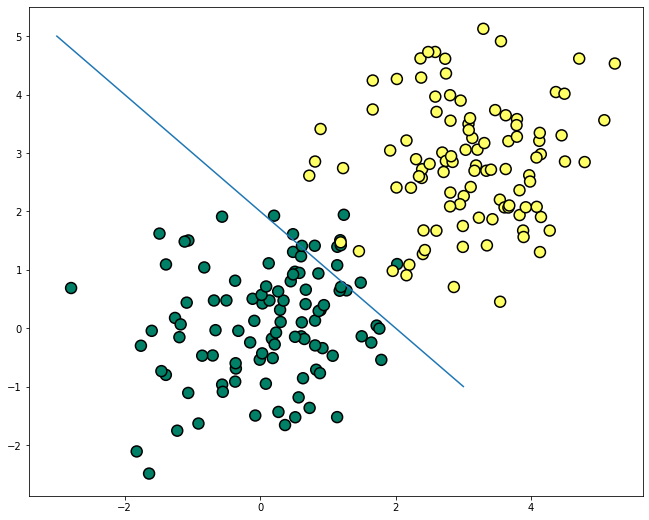

In [6]:
plt.rcParams['figure.figsize']=(11,9)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label, s=120, 
           cmap='summer', edgecolors='black', linewidth=1.5)
plt.plot(range(-3,4), range(5,-2,-1))

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)
clf_tree.fit(train_data, train_label)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

In [9]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

<ipython-input-10-17b7bf53af37>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='spring')


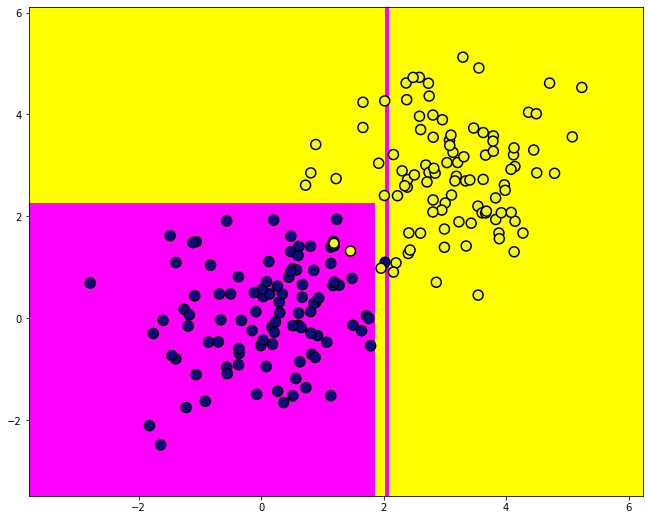

In [10]:
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_label, s=100, 
        cmap='plasma', edgecolors='black', linewidth=1.5);

In [12]:
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
out_file='small_tree.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng 'small_tree.dot' -o 'small_tree.png'

"dot" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [11]:
from sklearn import tree

[Text(341.0, 428.08500000000004, 'X[0] <= 1.854\nentropy = 1.0\nsamples = 200\nvalue = [100, 100]'),
 Text(204.60000000000002, 305.775, 'X[1] <= 2.276\nentropy = 0.383\nsamples = 107\nvalue = [99, 8]'),
 Text(136.4, 183.46500000000003, 'X[0] <= 1.186\nentropy = 0.14\nsamples = 101\nvalue = [99, 2]'),
 Text(68.2, 61.15499999999997, 'entropy = 0.0\nsamples = 89\nvalue = [89, 0]'),
 Text(204.60000000000002, 61.15499999999997, 'entropy = 0.65\nsamples = 12\nvalue = [10, 2]'),
 Text(272.8, 183.46500000000003, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(477.40000000000003, 305.775, 'X[0] <= 2.092\nentropy = 0.086\nsamples = 93\nvalue = [1, 92]'),
 Text(409.20000000000005, 183.46500000000003, 'X[0] <= 2.021\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(341.0, 61.15499999999997, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(477.40000000000003, 61.15499999999997, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(545.6, 183.46500000000003, 'entropy = 0.0\nsamples = 88

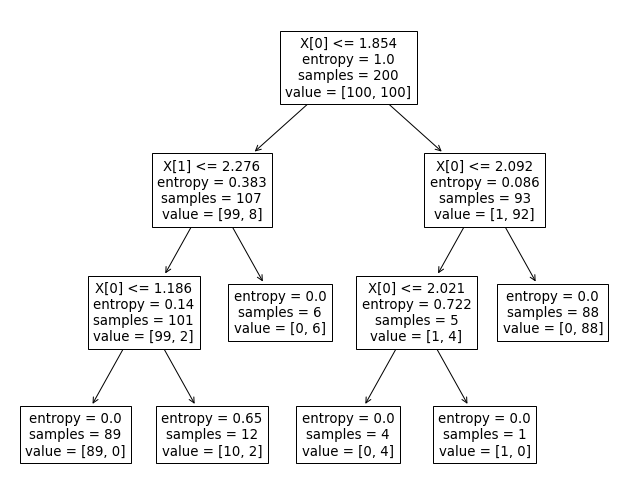

In [12]:
tree.plot_tree(clf_tree)

# Регрессия на деревьях решений

In [13]:
n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)


In [14]:
def generate(nsampl, noise): 
    X= np.random.rand(nsampl)*10-5
    X=np.sort(X).ravel()
    y=np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)+np.random.normal(0.0, noise, nsampl)
    X=X.reshape((nsampl,1))
    return  X,y
    

In [15]:
X_train, y_train =generate(nsampl=n_train, noise= noise)
X_test, y_test =generate(nsampl=n_test, noise= noise)


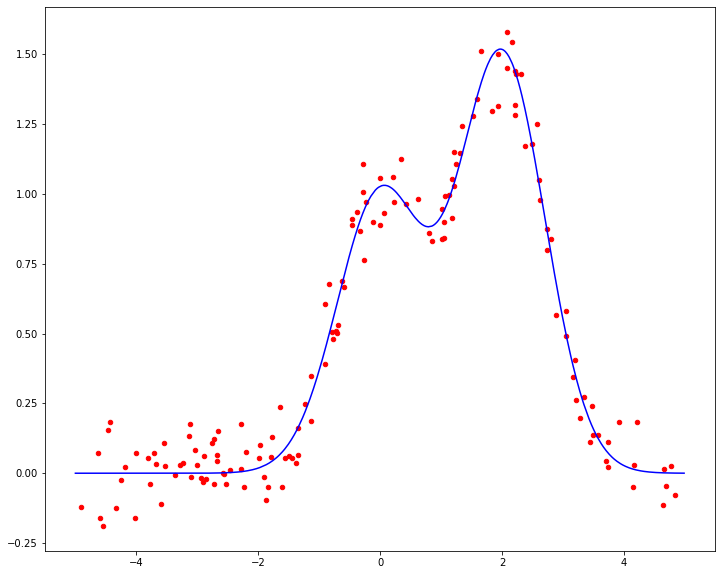

In [16]:
plt.figure(figsize=(12, 10))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="r", s=20)
plt.show()

In [17]:
from sklearn.tree import DecisionTreeRegressor
reg_tree=DecisionTreeRegressor(max_depth=6, random_state=17)
reg_tree.fit(X_train, y_train)
reg_tree_pred= reg_tree.predict(X_test)


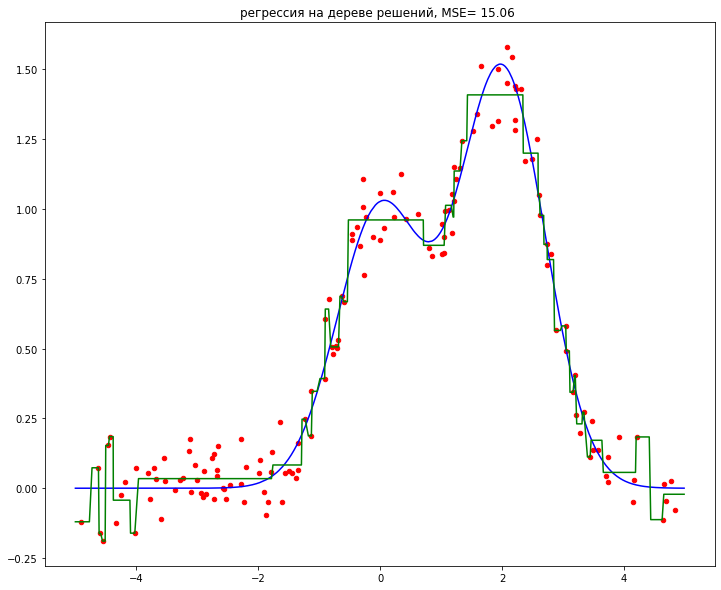

In [18]:
plt.figure(figsize=(12, 10))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="r", s=20)
plt.plot(X_test, reg_tree_pred, 'g')
plt.title('регрессия на дереве решений, MSE= %3.2f '% np.sum((y_test-reg_tree_pred)**2))
plt.show()

[Text(256.58035714285717, 454.2942857142857, 'X[0] <= -0.903\nmse = 0.259\nsamples = 150\nvalue = 0.475'),
 Text(112.59642857142859, 384.40285714285716, 'X[0] <= -1.288\nmse = 0.012\nsamples = 63\nvalue = 0.047'),
 Text(65.76428571428572, 314.51142857142855, 'X[0] <= -4.505\nmse = 0.008\nsamples = 59\nvalue = 0.03'),
 Text(31.88571428571429, 244.62, 'X[0] <= -4.614\nmse = 0.011\nsamples = 4\nvalue = -0.1'),
 Text(15.942857142857145, 174.7285714285714, 'X[0] <= -4.767\nmse = 0.009\nsamples = 2\nvalue = -0.023'),
 Text(7.971428571428572, 104.83714285714285, 'mse = 0.0\nsamples = 1\nvalue = -0.12'),
 Text(23.914285714285718, 104.83714285714285, 'mse = -0.0\nsamples = 1\nvalue = 0.073'),
 Text(47.828571428571436, 174.7285714285714, 'X[0] <= -4.57\nmse = 0.0\nsamples = 2\nvalue = -0.176'),
 Text(39.85714285714286, 104.83714285714285, 'mse = 0.0\nsamples = 1\nvalue = -0.162'),
 Text(55.800000000000004, 104.83714285714285, 'mse = -0.0\nsamples = 1\nvalue = -0.189'),
 Text(99.64285714285715, 2

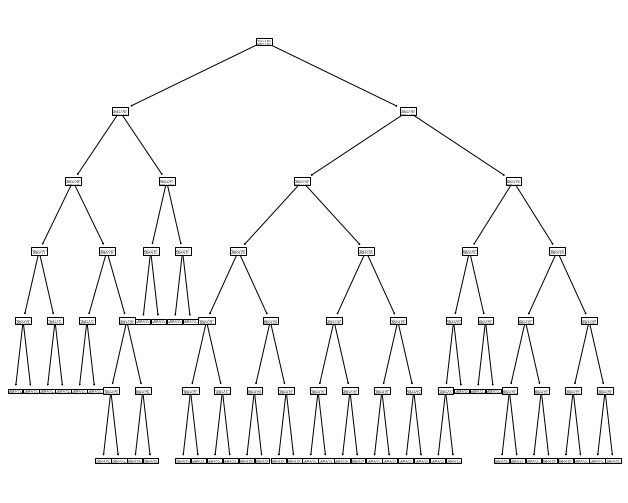

In [19]:
tree.plot_tree(reg_tree)

# PCA

In [43]:
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y))
print(X)

[[ 1.          2.          3.          4.          5.          6.
   7.          8.          9.         10.        ]
 [ 4.50068505  5.50041904  6.16904147  6.68597551  9.92136418 11.39818531
  12.60475545 15.08481378 13.34845972 18.60430348]]


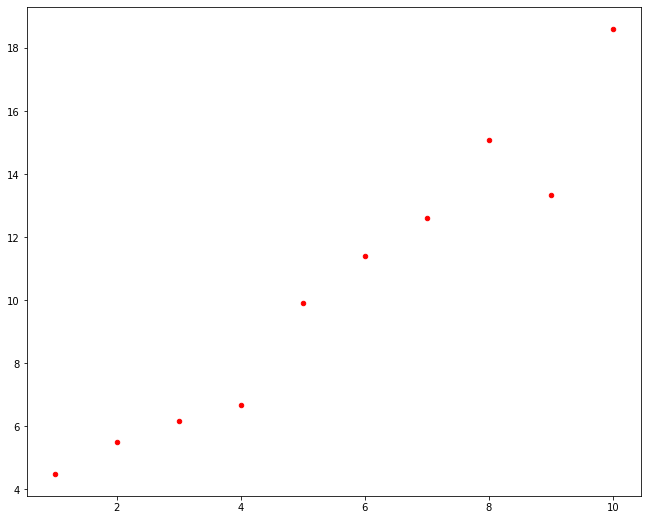

In [45]:
plt.scatter(x, y, c="r", s=20)


In [46]:
Xcentered = (X[0] - x.mean(), X[1] - y.mean())

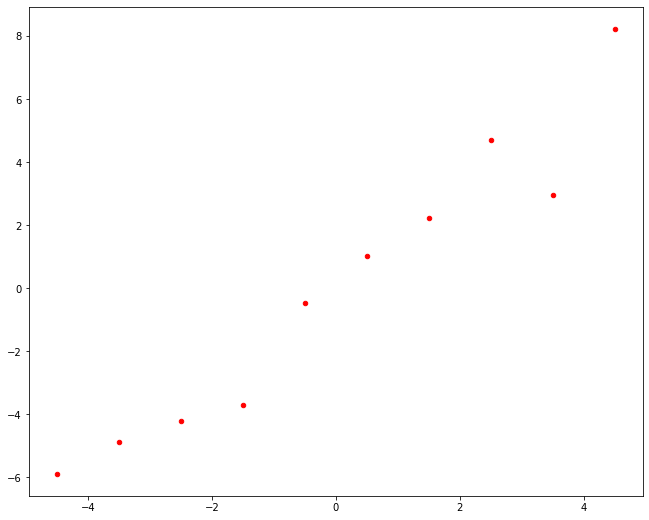

In [49]:
plt.scatter(Xcentered[0], Xcentered[1], c="r", s=20)


In [50]:
m=(x.mean(),y.mean() )

In [51]:
covM=np.cov(Xcentered)

In [52]:
covM

array([[ 9.16666667, 13.6489374 ],
       [13.6489374 , 21.6152655 ]])

In [56]:
_, vecs = np.linalg.eig(covM)
v = -vecs[:,1]
Xnew = np.dot(v,Xcentered)
print(Xnew)

[-7.38055706 -5.99880482 -4.89555271 -3.91988671 -0.65771055  1.12532283
  2.68104632  5.30790914  4.38831963  9.34991392]


In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(transpose(Xcentered))

NameError: name 'transpose' is not defined